In [1]:
# Importando Bibliotecas
# Importando Bibliotecas
from math import pi, sqrt, cosh, sinh
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# Tolerância:
tol = 1e-8

# Comprimento:
C = 4e-1          # 0,4 m

# Largura:
L = 4e-1          # 0,4 m

# Densidade:
ro = 2700         # kg/m3

# Condutividade térmica:
k = 230           # W/mK

# Calor específico:
c = 896           # J/kgK

# Temperatura da base:
Tb = 100          # °C

# Temperatura na extremidade:
TL = 25           # °C

# Temperatura ambiente:
Tinf = 50         # °C


## DADOS DO MODELO NUMÉRICO:

# Variação em x:
delta_x = 1e-2    # m
delta_y = 1e-2    # m

# Tempo de Simulação inicial:
tempo = 10000      # s

In [3]:
# Número de divisões do tamanho da aleta:
nx = int(C / delta_x) + 1
ny = int(L / delta_y) + 1

# variáveis calculadas:
alpha = k/(ro*c)

## VALORES TEMPORAIS:

# Variação mínima temporal:
delta_t =  (delta_x**2/(4*alpha)) * 0.9  # "*0.9" para ser menor que o valor calculado

# número de iterações no tempo determinado espaçadas por um delta t:
passos = len(np.arange(0, tempo, delta_t))

In [4]:
# Gerando a matriz com as condições de temperatura expecificadas
TM = np.zeros((passos, nx, ny))

TM[:,0,:] = 100
TM[:, :, 0] = 75
TM[:, :, ny-1] = 50
TM[:, nx-1, :] = 0


In [5]:
# fator de multiplicação:
lambida = alpha*(delta_t)/((delta_x)**2)

# Inicializando o erro
erro = 1 

# Inicializando a variável para guardar a ultima iteração feita
t = 1

for l in range(0,passos-1):
    for i in range(1,nx-1):
        for j in range(1, ny-1):
            TM[l+1,i, j] = TM[l,i,j] + lambida * (TM[l,i+1,j] + TM[l,i-1,j] + TM[l,i,j-1] + TM[l,i,j+1] - 4*TM[l,i,j])

    erro = np.amax(abs((TM[l+1, 1:-1, 1:-1] - TM[l, 1:-1, 1:-1]) / TM[l+1, 1:-1, 1:-1]))  # Cálculo do erro

    # Em caso do erro ser menor ou igual à tolerância indicada, deve parar as iterações e guardar a chave da última iteração
    if erro <= tol:
        print('Convergiu!')
        t = l
        break

# Caso o erro ainda seja maior que a tolerância indicada, pedir para aumentar o tempo de iteração
if(erro > tol):
    t = passos
    print("|  O número de iterações não foi suficiente para alcançar a tolerância exigida.")
    print(f"|  O erro calculado foi: {0}", erro)
    print("|  Aumente o tempo de execução para diminuir o erro.")


<ipython-input-5-3d85f36f1548>:15: RuntimeWarning: invalid value encountered in true_divide
  erro = np.amax(abs((TM[l+1, 1:-1, 1:-1] - TM[l, 1:-1, 1:-1]) / TM[l+1, 1:-1, 1:-1]))  # Cálculo do erro


Convergiu!


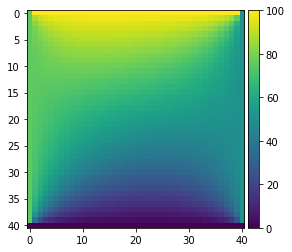

In [6]:
ax = plt.subplot(111)
im = ax.imshow(TM[t-1,:,:])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size= "5%", pad = 0.05)
plt.colorbar(im, cax=cax)

In [7]:
# Temperatura do nó central:
print(f'A temperatura do nó central é: {TM[t,int((nx-1)/2),int((ny-1)/2)]} °C')

A temperatura do nó central é: 56.24984221277244 °C
